In [1]:
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import pandas as pd
import os
from matplotlib import pyplot as plt
import matplotlib as mpl
mpl.style.use('default')
import numpy as np
kernel = np.ones(1000)

In [2]:
log_dir='C:/Users/Sam/Downloads/results/runs/'

In [3]:
for experiment in os.listdir(log_dir):
    for run in os.listdir(os.path.join(log_dir,experiment)):
        for seed in os.listdir(os.path.join(log_dir,experiment,run)):
            for f in  os.listdir(os.path.join(log_dir,experiment,run,seed)):
                print(os.path.join(experiment,run,seed, f))
    print()

continuous_prob\ppo2\0\Sep01_00-08-24_624c004645e5
continuous_prob\ppo2\1\Sep01_00-12-59_d19391afb22f
continuous_prob\ppo2\2\Sep01_05-55-37_DESKTOP-1BJBIHE
continuous_prob\ppo4\0\Sep01_00-24-25_624c004645e5
continuous_prob\ppo4\1\Sep01_00-29-44_d19391afb22f
continuous_prob\ppo4\2\Sep01_06-24-54_DESKTOP-1BJBIHE
continuous_prob\ppo8\0\Sep01_00-46-28_624c004645e5
continuous_prob\ppo8\1\Sep01_00-52-56_d19391afb22f
continuous_prob\ppo8\2\Sep01_07-07-50_DESKTOP-1BJBIHE

discrete_ent\ppo2\0\Aug31_22-11-03_624c004645e5
discrete_ent\ppo2\1\Aug31_22-11-11_d19391afb22f
discrete_ent\ppo2\2\Sep01_02-12-13_DESKTOP-1BJBIHE
discrete_ent\ppo4\0\Aug31_22-24-10_624c004645e5
discrete_ent\ppo4\1\Aug31_22-24-43_d19391afb22f
discrete_ent\ppo4\2\Sep01_02-35-50_DESKTOP-1BJBIHE
discrete_ent\ppo8\0\Aug31_22-42-07_624c004645e5
discrete_ent\ppo8\1\Aug31_22-43-24_d19391afb22f
discrete_ent\ppo8\2\Sep01_03-09-27_DESKTOP-1BJBIHE

discrete_prob\ppo2\0\Aug31_23-09-36_624c004645e5
discrete_prob\ppo2\1\Aug31_23-12-01_d193

In [4]:
R = {}

In [5]:
for experiment in os.listdir(log_dir):
    if experiment not in R:
        R[experiment]={}
    for run in os.listdir(os.path.join(log_dir,experiment)):
        if run not in R[experiment]:
            R[experiment][run]={}
        for seed in os.listdir(os.path.join(log_dir,experiment,run)):

            file_name = os.listdir(os.path.join(log_dir,experiment,run,seed))[0]
            print(os.path.join(log_dir, experiment, run, seed, file_name).replace('\\','/'))

            acc = EventAccumulator(os.path.join(log_dir, experiment, run, seed, file_name).replace('\\','/'))
            acc.Reload()
            df = pd.DataFrame(acc.Scalars("Reward"))
            
            R[experiment][run][seed] = df

C:/Users/Sam/Downloads/results/runs/continuous_prob/ppo2/0/Sep01_00-08-24_624c004645e5
C:/Users/Sam/Downloads/results/runs/continuous_prob/ppo2/1/Sep01_00-12-59_d19391afb22f
C:/Users/Sam/Downloads/results/runs/continuous_prob/ppo2/2/Sep01_05-55-37_DESKTOP-1BJBIHE
C:/Users/Sam/Downloads/results/runs/continuous_prob/ppo4/0/Sep01_00-24-25_624c004645e5
C:/Users/Sam/Downloads/results/runs/continuous_prob/ppo4/1/Sep01_00-29-44_d19391afb22f
C:/Users/Sam/Downloads/results/runs/continuous_prob/ppo4/2/Sep01_06-24-54_DESKTOP-1BJBIHE
C:/Users/Sam/Downloads/results/runs/continuous_prob/ppo8/0/Sep01_00-46-28_624c004645e5
C:/Users/Sam/Downloads/results/runs/continuous_prob/ppo8/1/Sep01_00-52-56_d19391afb22f
C:/Users/Sam/Downloads/results/runs/continuous_prob/ppo8/2/Sep01_07-07-50_DESKTOP-1BJBIHE
C:/Users/Sam/Downloads/results/runs/discrete_ent/ppo2/0/Aug31_22-11-03_624c004645e5
C:/Users/Sam/Downloads/results/runs/discrete_ent/ppo2/1/Aug31_22-11-11_d19391afb22f
C:/Users/Sam/Downloads/results/runs/disc

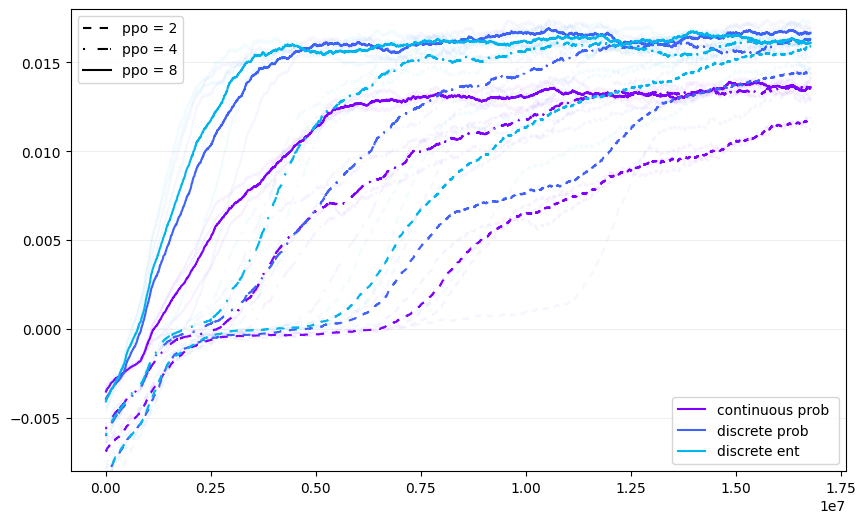

In [6]:
fig, axes = plt.subplots(figsize=(10,6))

color = plt.cm.rainbow(np.linspace(0, 1, 9))
dashes = [(4, 4),(1, 6, 5),()]

i=0
j=0
E=R['continuous_prob']

for run in E:
    Y=[]
    for seed in E[run]:
        y = E[run][seed]['value'].to_numpy()
        x = E[run][seed]['step'].to_numpy()
        plt.plot(x*128, np.convolve(y, kernel, 'same')/np.convolve(np.ones_like(y), kernel, 'same'), color=color[0], alpha=0.05, dashes=dashes[i])
        Y.append(y)
    Y=np.stack(Y).mean(0)
    if run == 'ppo8':
        plt.plot(x*128, np.convolve(Y, kernel, 'same')/np.convolve(np.ones_like(y), kernel, 'same'), label= 'continuous prob ', color=color[j], dashes=dashes[i])
    else:
        plt.plot(x*128, np.convolve(Y, kernel, 'same')/np.convolve(np.ones_like(y), kernel, 'same'), color=color[j], dashes=dashes[i])
    i+=1

i=0
j=1
E=R['discrete_prob']

for run in E:
    Y=[]
    for seed in E[run]:
        y = E[run][seed]['value'].to_numpy()
        x = E[run][seed]['step'].to_numpy()
        plt.plot(x*128, np.convolve(y, kernel, 'same')/np.convolve(np.ones_like(y), kernel, 'same'), color=color[1], dashes=dashes[i], alpha=0.05)
        Y.append(y)
    Y=np.stack(Y).mean(0)
    if run == 'ppo8':
        plt.plot(x*128, np.convolve(Y, kernel, 'same')/np.convolve(np.ones_like(y), kernel, 'same'), label= 'discrete prob ', color=color[j], dashes=dashes[i])
    else:
        plt.plot(x*128, np.convolve(Y, kernel, 'same')/np.convolve(np.ones_like(y), kernel, 'same'), color=color[j], dashes=dashes[i])
    i+=1

i=0
j=2
E=R['discrete_ent']

for run in E:
    Y=[]
    for seed in E[run]:
        y = E[run][seed]['value'].to_numpy()
        x = E[run][seed]['step'].to_numpy()
        plt.plot(x*128, np.convolve(y, kernel, 'same')/np.convolve(np.ones_like(y), kernel, 'same'), color=color[2], dashes=dashes[i], alpha=0.05)
        Y.append(y)
    Y=np.stack(Y).mean(0)
    if run == 'ppo8':
        plt.plot(x*128, np.convolve(Y, kernel, 'same')/np.convolve(np.ones_like(y), kernel, 'same'), label= 'discrete ent ', color=color[j], dashes=dashes[i])
    else:
        plt.plot(x*128, np.convolve(Y, kernel, 'same')/np.convolve(np.ones_like(y), kernel, 'same'), color=color[j], dashes=dashes[i])
    i+=1

legend1 = plt.legend()

style_dummys=[]
for i in range(3):
    style_dummys.append(axes.plot([],[], c="black", dashes=dashes[i])[0])

legend2 = plt.legend(style_dummys, [ "ppo = 2","ppo = 4","ppo = 8"], loc=2)
axes.add_artist(legend1)
plt.ylim([-0.008,0.018])
plt.grid(axis='y', alpha=0.2)

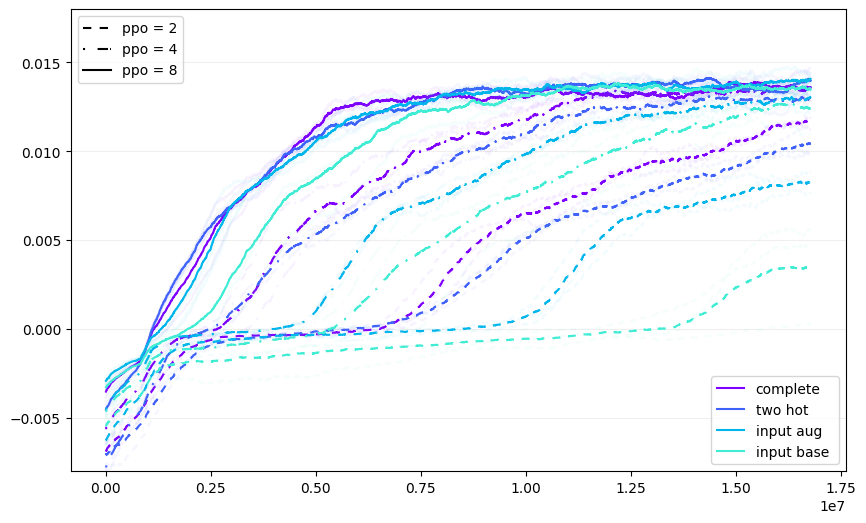

In [7]:
fig, axes = plt.subplots(figsize=(10,6))

color = plt.cm.rainbow(np.linspace(0, 1, 9))
dashes = [(4, 4),(1, 6, 5),()]

i=0
j=0
E=R['continuous_prob']

for run in E:
    Y=[]
    for seed in E[run]:
        y = E[run][seed]['value'].to_numpy()
        x = E[run][seed]['step'].to_numpy()
        plt.plot(x*128, np.convolve(y, kernel, 'same')/np.convolve(np.ones_like(y), kernel, 'same'), color=color[j], alpha=0.05, dashes=dashes[i])
        Y.append(y)
    Y=np.stack(Y).mean(0)
    if run == 'ppo8':
        plt.plot(x*128, np.convolve(Y, kernel, 'same')/np.convolve(np.ones_like(y), kernel, 'same'), label='complete', color=color[j], dashes=dashes[i])
    else:
        plt.plot(x*128, np.convolve(Y, kernel, 'same')/np.convolve(np.ones_like(y), kernel, 'same'), color=color[j], dashes=dashes[i])
    i+=1

i=0
j=1
E=R['two_hot']

for run in E:
    Y=[]
    for seed in E[run]:
        y = E[run][seed]['value'].to_numpy()
        x = E[run][seed]['step'].to_numpy()
        plt.plot(x*128, np.convolve(y, kernel, 'same')/np.convolve(np.ones_like(y), kernel, 'same'), color=color[j], dashes=dashes[i], alpha=0.05)
        Y.append(y)
    Y=np.stack(Y).mean(0)
    if run == 'ppo8':
        plt.plot(x*128, np.convolve(Y, kernel, 'same')/np.convolve(np.ones_like(y), kernel, 'same'), label='two hot ', color=color[j], dashes=dashes[i])
    else:
        plt.plot(x*128, np.convolve(Y, kernel, 'same')/np.convolve(np.ones_like(y), kernel, 'same'), color=color[j], dashes=dashes[i])
    i+=1

i=0
j=2
E=R['input_aug']

for run in E:
    Y=[]
    for seed in E[run]:
        y = E[run][seed]['value'].to_numpy()
        x = E[run][seed]['step'].to_numpy()
        plt.plot(x*128, np.convolve(y, kernel, 'same')/np.convolve(np.ones_like(y), kernel, 'same'), color=color[j], dashes=dashes[i], alpha=0.05)
        Y.append(y)
    Y=np.stack(Y).mean(0)
    if run == 'ppo8':
        plt.plot(x*128, np.convolve(Y, kernel, 'same')/np.convolve(np.ones_like(y), kernel, 'same'), label= 'input aug ', color=color[j], dashes=dashes[i])
    else:
        plt.plot(x*128, np.convolve(Y, kernel, 'same')/np.convolve(np.ones_like(y), kernel, 'same'), color=color[j], dashes=dashes[i])
    i+=1

i=0
j=3
E=R['input_base']

for run in E:
    Y=[]
    for seed in E[run]:
        y = E[run][seed]['value'].to_numpy()
        x = E[run][seed]['step'].to_numpy()
        plt.plot(x*128, np.convolve(y, kernel, 'same')/np.convolve(np.ones_like(y), kernel, 'same'), color=color[j], dashes=dashes[i], alpha=0.05)
        Y.append(y)
    Y=np.stack(Y).mean(0)
    if run == 'ppo8':
        plt.plot(x*128, np.convolve(Y, kernel, 'same')/np.convolve(np.ones_like(y), kernel, 'same'), label= 'input base ', color=color[j], dashes=dashes[i])
    else:
        plt.plot(x*128, np.convolve(Y, kernel, 'same')/np.convolve(np.ones_like(y), kernel, 'same'), color=color[j], dashes=dashes[i])
    i+=1


legend1 = plt.legend( loc=4)

style_dummys=[]
for i in range(3):
    style_dummys.append(axes.plot([],[], c="black", dashes=dashes[i])[0])

legend2 = plt.legend(style_dummys, [ "ppo = 2","ppo = 4","ppo = 8"], loc=2)
axes.add_artist(legend1)
plt.ylim([-0.008,0.018])
plt.grid(axis='y', alpha=0.2)

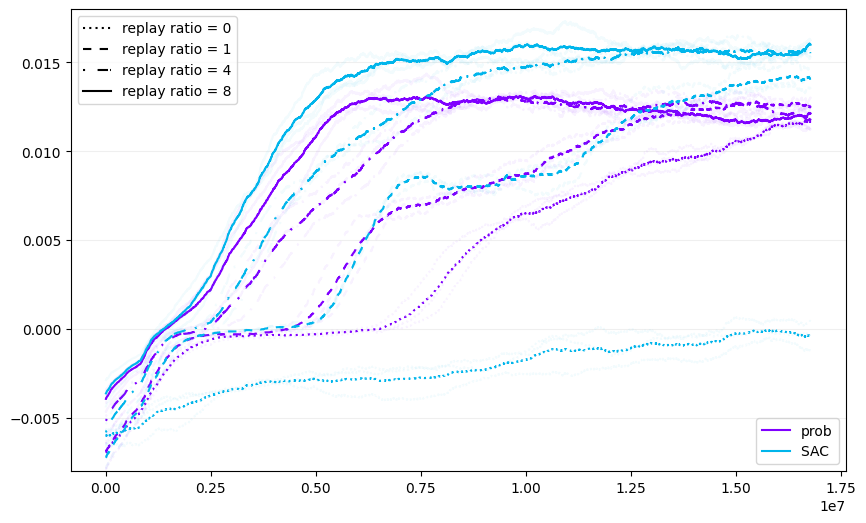

In [15]:
fig, axes = plt.subplots(figsize=(10,6))

color = plt.cm.rainbow(np.linspace(0, 1, 9))
dashes = [(1, 2),(4, 4),(1, 6, 5),()]

i=0
j=0



E=R['continuous_prob']
run = 'ppo2'
Y=[]
for seed in E[run]:
    y = E[run][seed]['value'].to_numpy()
    x = E[run][seed]['step'].to_numpy()
    plt.plot(x*128, np.convolve(y, kernel, 'same')/np.convolve(np.ones_like(y), kernel, 'same'), color=color[j], alpha=0.05, dashes=dashes[i])
    Y.append(y)
Y=np.stack(Y).mean(0)
if run == 'ppo8':
    plt.plot(x*128, np.convolve(Y, kernel, 'same')/np.convolve(np.ones_like(y), kernel, 'same'), label='complete', color=color[j], dashes=dashes[i])
else:
    plt.plot(x*128, np.convolve(Y, kernel, 'same')/np.convolve(np.ones_like(y), kernel, 'same'), color=color[j], dashes=dashes[i])
i+=1

E=R['ppo_acer_prob']
for run in E:
    if 'ppo2' in run:
        Y=[]
        for seed in E[run]:
            y = E[run][seed]['value'].to_numpy()
            x = E[run][seed]['step'].to_numpy()
            plt.plot(x*128, np.convolve(y, kernel, 'same')/np.convolve(np.ones_like(y), kernel, 'same'), color=color[j], alpha=0.05, dashes=dashes[i])
            Y.append(y)
        Y=np.stack(Y).mean(0)
        if 'rr8' in run:
            plt.plot(x*128, np.convolve(Y, kernel, 'same')/np.convolve(np.ones_like(y), kernel, 'same'), label='prob', color=color[j], dashes=dashes[i])
        else:
            plt.plot(x*128, np.convolve(Y, kernel, 'same')/np.convolve(np.ones_like(y), kernel, 'same'), color=color[j], dashes=dashes[i])
        i+=1

i=0
j=2

E=R['ppo_acer_sac']
for run in E:
    if 'ppo2' in run:
        Y=[]
        for seed in E[run]:
            y = E[run][seed]['value'].to_numpy()
            x = E[run][seed]['step'].to_numpy()
            plt.plot(x*128, np.convolve(y, kernel, 'same')/np.convolve(np.ones_like(y), kernel, 'same'), color=color[j], dashes=dashes[i], alpha=0.05)
            Y.append(y)
        Y=np.stack(Y).mean(0)
        if 'rr8' in run:
            plt.plot(x*128, np.convolve(Y, kernel, 'same')/np.convolve(np.ones_like(y), kernel, 'same'), label='SAC ', color=color[j], dashes=dashes[i])
        else:
            plt.plot(x*128, np.convolve(Y, kernel, 'same')/np.convolve(np.ones_like(y), kernel, 'same'), color=color[j], dashes=dashes[i])
        i+=1



legend1 = plt.legend( loc=4)

style_dummys=[]
for i in range(4):
    style_dummys.append(axes.plot([],[], c="black", dashes=dashes[i])[0])

legend2 = plt.legend(style_dummys, [ "replay ratio = 0", "replay ratio = 1","replay ratio = 4","replay ratio = 8"], loc=2)
axes.add_artist(legend1)
plt.ylim([-0.008,0.018])
plt.grid(axis='y', alpha=0.2)

In [11]:
i

4

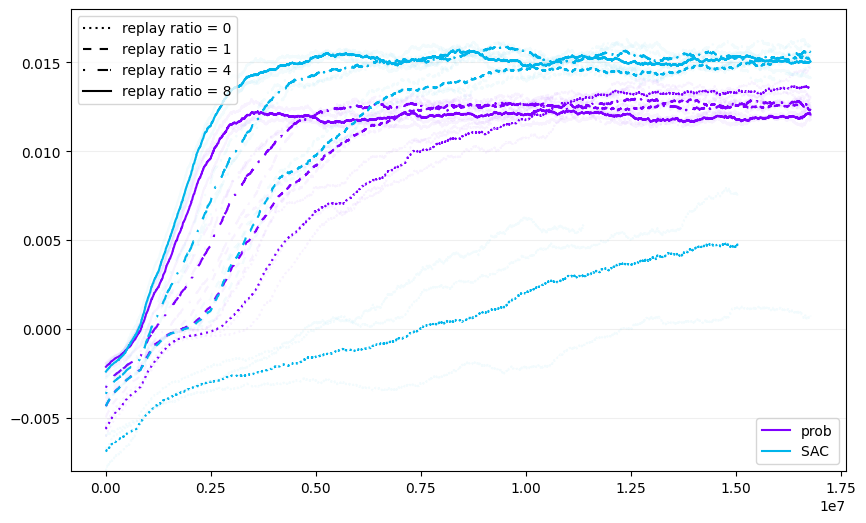

In [13]:
fig, axes = plt.subplots(figsize=(10,6))

color = plt.cm.rainbow(np.linspace(0, 1, 9))
dashes = [(1, 2),(4, 4),(1, 6, 5),()]

i=0
j=0

E=R['continuous_prob']
run = 'ppo4'
Y=[]
for seed in E[run]:
    y = E[run][seed]['value'].to_numpy()
    x = E[run][seed]['step'].to_numpy()
    plt.plot(x*128, np.convolve(y, kernel, 'same')/np.convolve(np.ones_like(y), kernel, 'same'), color=color[j], alpha=0.05, dashes=dashes[i])
    Y.append(y)
Y=np.stack(Y).mean(0)
if run == 'ppo8':
    plt.plot(x*128, np.convolve(Y, kernel, 'same')/np.convolve(np.ones_like(y), kernel, 'same'), label='complete', color=color[j], dashes=dashes[i])
else:
    plt.plot(x*128, np.convolve(Y, kernel, 'same')/np.convolve(np.ones_like(y), kernel, 'same'), color=color[j], dashes=dashes[i])
i+=1


E=R['ppo_acer_prob']
for run in E:
    if 'ppo4' in run:
        Y=[]
        for seed in E[run]:
            y = E[run][seed]['value'].to_numpy()
            x = E[run][seed]['step'].to_numpy()
            plt.plot(x*128, np.convolve(y, kernel, 'same')/np.convolve(np.ones_like(y), kernel, 'same'), color=color[j], alpha=0.05, dashes=dashes[i])
            Y.append(y)
        Y=np.stack(Y).mean(0)
        if 'rr8' in run:
            plt.plot(x*128, np.convolve(Y, kernel, 'same')/np.convolve(np.ones_like(y), kernel, 'same'), label='prob', color=color[j], dashes=dashes[i])
        else:
            plt.plot(x*128, np.convolve(Y, kernel, 'same')/np.convolve(np.ones_like(y), kernel, 'same'), color=color[j], dashes=dashes[i])
        i+=1

i=0
j=2
E=R['ppo_acer_sac']
for run in E:
    if 'ppo4' in run:
        Y=[]
        for seed in E[run]:
            y = E[run][seed]['value'].to_numpy()
            x = E[run][seed]['step'].to_numpy()
            plt.plot(x*128, np.convolve(y, kernel, 'same')/np.convolve(np.ones_like(y), kernel, 'same'), color=color[j], dashes=dashes[i], alpha=0.05)
            Y.append(y)
        Y=np.stack(Y).mean(0)
        if 'rr8' in run:
            plt.plot(x*128, np.convolve(Y, kernel, 'same')/np.convolve(np.ones_like(y), kernel, 'same'), label='SAC ', color=color[j], dashes=dashes[i])
        else:
            plt.plot(x*128, np.convolve(Y, kernel, 'same')/np.convolve(np.ones_like(y), kernel, 'same'), color=color[j], dashes=dashes[i])
        i+=1



legend1 = plt.legend( loc=4)

style_dummys=[]
for i in range(4):
    style_dummys.append(axes.plot([],[], c="black", dashes=dashes[i])[0])

legend2 = plt.legend(style_dummys, [ "replay ratio = 0", "replay ratio = 1","replay ratio = 4","replay ratio = 8"], loc=2)
axes.add_artist(legend1)
plt.ylim([-0.008,0.018])
plt.grid(axis='y', alpha=0.2)